In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# Load the dataset
sales_data = pd.read_csv(r'C:\sales_data_missing.csv')
sales_data

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
0,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3.0,90.246230,1
1,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2.0,60.586312,2
2,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5.0,96.612695,3
3,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5.0,16.962671,4
4,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5.0,65.215310,5
...,...,...,...,...,...,...,...,...
95,Store 10,Customer 711,86284,Toys,5/23/2005 16:11,8.0,93.641214,96
96,Store 13,Customer 776,15381,Health,11/17/2006 0:55,2.0,81.335683,97
97,Store 14,Customer 1996,47830,Electronics,2/1/2008 18:44,3.0,54.128274,98
98,Store 12,Customer 1511,32795,Home/Garden,7/6/2005 17:24,6.0,97.923186,99


In [3]:
# Preprocess the data
sales_data['date'] = pd.to_datetime(sales_data['date'], format='%m/%d/%Y %H:%M')
sales_data

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
0,Store 01,Customer 1508,53642,Toys,2007-04-01 08:09:00,3.0,90.246230,1
1,Store 15,Customer 169,90945,Movies,2005-02-15 10:47:00,2.0,60.586312,2
2,Store 12,Customer 124,18548,Movies,2007-09-27 05:38:00,5.0,96.612695,3
3,Store 05,Customer 1988,85359,Books,2005-05-07 13:19:00,5.0,16.962671,4
4,Store 01,Customer 475,80069,Clothing,2008-01-06 17:36:00,5.0,65.215310,5
...,...,...,...,...,...,...,...,...
95,Store 10,Customer 711,86284,Toys,2005-05-23 16:11:00,8.0,93.641214,96
96,Store 13,Customer 776,15381,Health,2006-11-17 00:55:00,2.0,81.335683,97
97,Store 14,Customer 1996,47830,Electronics,2008-02-01 18:44:00,3.0,54.128274,98
98,Store 12,Customer 1511,32795,Home/Garden,2005-07-06 17:24:00,6.0,97.923186,99


In [4]:

sales_data['amount'].fillna(sales_data['amount'].median(), inplace=True)
sales_data['single_price'].fillna(sales_data['single_price'].median(), inplace=True)
sales_data['product_category'].fillna('Unknown', inplace=True)



In [5]:

sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month
sales_data['day'] = sales_data['date'].dt.day
sales_data['hour'] = sales_data['date'].dt.hour

In [6]:

sales_data['total_sales'] = sales_data['amount'] * sales_data['single_price']

In [7]:
sales_data

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id,year,month,day,hour,total_sales
0,Store 01,Customer 1508,53642,Toys,2007-04-01 08:09:00,3.0,90.246230,1,2007,4,1,8,270.738691
1,Store 15,Customer 169,90945,Movies,2005-02-15 10:47:00,2.0,60.586312,2,2005,2,15,10,121.172625
2,Store 12,Customer 124,18548,Movies,2007-09-27 05:38:00,5.0,96.612695,3,2007,9,27,5,483.063475
3,Store 05,Customer 1988,85359,Books,2005-05-07 13:19:00,5.0,16.962671,4,2005,5,7,13,84.813354
4,Store 01,Customer 475,80069,Clothing,2008-01-06 17:36:00,5.0,65.215310,5,2008,1,6,17,326.076552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Store 10,Customer 711,86284,Toys,2005-05-23 16:11:00,8.0,93.641214,96,2005,5,23,16,749.129712
96,Store 13,Customer 776,15381,Health,2006-11-17 00:55:00,2.0,81.335683,97,2006,11,17,0,162.671367
97,Store 14,Customer 1996,47830,Electronics,2008-02-01 18:44:00,3.0,54.128274,98,2008,2,1,18,162.384822
98,Store 12,Customer 1511,32795,Home/Garden,2005-07-06 17:24:00,6.0,97.923186,99,2005,7,6,17,587.539118


In [8]:
sales_data.isnull().sum()

store_id            0
customer_id         0
product_id          0
product_category    0
date                0
amount              0
single_price        0
transaction_id      0
year                0
month               0
day                 0
hour                0
total_sales         0
dtype: int64

In [9]:
# Creating the data cube
data_cube = sales_data.pivot_table(
    values='total_sales', 
    columns=['store_id', 'product_category'], 
    index=['year', 'month'], 
    aggfunc='sum',  
    fill_value=0
)
data_cube

store_id            Store 01                                                 \
product_category       Books    Clothing     Health Home/Garden        Toys   
year month                                                                    
2005 2              0.000000    0.000000   0.000000    0.000000    0.000000   
     5              0.000000    0.000000   0.000000    0.000000    0.000000   
     6              0.000000    0.000000   0.000000    0.000000    0.000000   
     7              0.000000    0.000000   0.000000    0.000000    0.000000   
     8              0.000000    0.000000   0.000000    0.000000    0.000000   
     9              0.000000    0.000000   0.000000    0.000000    0.000000   
     10             0.000000    0.000000   0.000000    0.000000    0.000000   
     11             0.000000    0.000000   0.000000    0.000000    0.000000   
     12             0.000000    0.000000   0.000000    0.000000    0.000000   
2006 1              0.000000    0.000000   0.000000    0.000000    0.000000   
     3              0.000000    0.000000   0.000000    0.000000    0.000000   
     4              0.000000    0.000000   0.000000    0.000000    0.000000   
     5              0.000000    0.000000   0.000000    0.000000    0.000000   
     6              0.000000    0.000000   0.000000    0.000000    0.000000   
     7              0.000000    0.000000   0.000000    0.000000    0.000000   
     8              0.000000    0.000000   0.000000    0.000000    0.000000   
     9            295.189800    0.000000   0.000000    0.000000    0.000000   
     10             0.000000    0.000000   0.000000    0.000000    0.000000   
     11             0.000000    0.000000   0.000000    0.000000  178.803416   
     12             0.000000    0.000000   0.000000    0.000000    0.000000   
2007 1              0.000000    0.000000   0.000000    0.000000    0.000000   
     2              0.000000    0.000000   0.000000    0.000000    0.000000   
     3              0.000000    0.000000   0.000000    0.000000    0.000000   
     4              0.000000    0.000000   0.000000    0.000000  270.738691   
     5              0.000000    0.000000   0.000000    0.000000    0.000000   
     6              0.000000    0.000000   0.000000    0.000000    0.000000   
     7              0.000000    0.000000   0.000000    0.000000    0.000000   
     8              0.000000    0.000000   0.000000    0.000000    0.000000   
     9              0.000000    0.000000   0.000000    0.000000    0.000000   
     11             0.000000    0.000000  44.732133    0.000000    0.000000   
     12           766.484699    0.000000   0.000000    0.000000    0.000000   
2008 1              0.000000  326.076552   0.000000    0.000000    0.000000   
     2              0.000000    0.000000   0.000000    0.000000    0.000000   
     4              0.000000    0.000000   0.000000  324.729805    0.000000   
     5              0.000000    0.000000   0.000000    0.000000    0.000000   
     6              0.000000    0.000000   0.000000    0.000000    0.000000   
     7              0.000000    0.000000   0.000000    0.000000    0.000000   
     8              0.000000    0.000000   0.000000    0.000000    0.000000   
     9              0.000000    0.000000   0.000000    0.000000    0.000000   
     11             0.000000    0.000000   0.000000    0.000000    0.000000   

store_id            Store 02                                                 \
product_category       Books Electronics      Movies     Sports        Toys   
year month                                                                    
2005 2              0.000000    0.000000    0.000000   0.000000    0.000000   
     5              0.000000    0.000000    0.000000   0.000000    0.000000   
     6              0.000000    0.000000    0.000000   0.000000    0.000000   
     7              0.000000    0.000000    0.000000   0.000000    0.000000   
     8              0.000000    0.000000    0.000

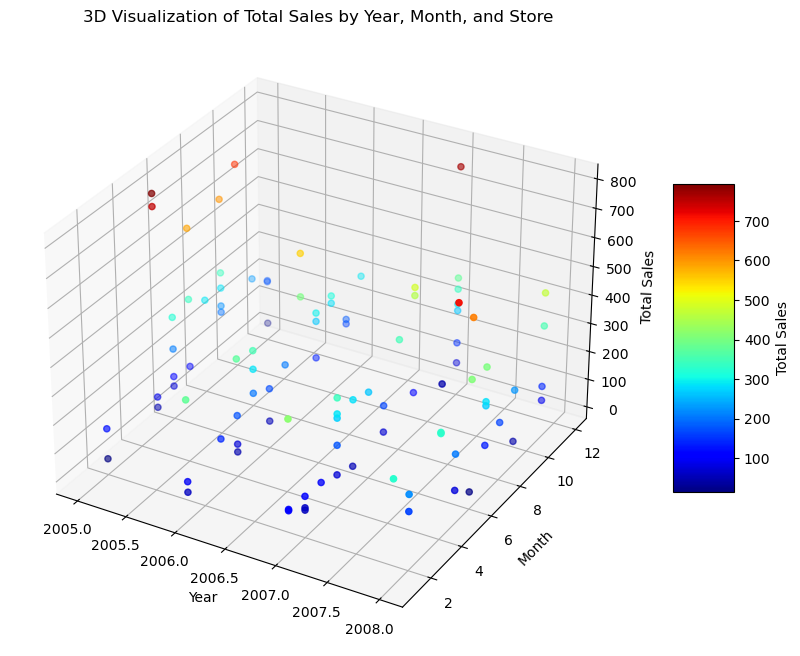

    store_id  product_id product_category  total_sales
3   Store 01       61867            Books   766.484699
9   Store 02       55677      Electronics   601.353768
15  Store 03       89794             Toys   348.052956
19  Store 04       83854           Sports   550.300276
22  Store 05       21123           Movies   680.903634
33  Store 06       83573           Sports   377.408916
35  Store 07       23870           Health   371.204263
38  Store 08       20905      Electronics   713.422101
47  Store 09       44122          Unknown   418.412934
62  Store 10       86284             Toys   749.129712
67  Store 11       69756           Movies   351.928145
73  Store 12       32913          Unknown   793.253430
78  Store 13       28515            Books   454.889101
86  Store 14       58636           Health   409.242791
99  Store 15       97871           Movies   398.835821


In [10]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sample_size = min(500, len(sales_data))
sampled_data = sales_data.sample(sample_size)
#3D scatter plot
scatter = ax.scatter(
    sampled_data['year'], 
    sampled_data['month'], 
    sampled_data['total_sales'], 
    c=sampled_data['total_sales'], 
    cmap='jet', 
    marker='o'
)

ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Total Sales')
ax.set_title('3D Visualization of Total Sales by Year, Month, and Store')

 
color_bar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
color_bar.set_label('Total Sales')

plt.show()


product_sales_by_store = sales_data.groupby(['store_id', 'product_id', 'product_category'])['total_sales'].sum().reset_index()
top_products_by_store = product_sales_by_store.loc[product_sales_by_store.groupby('store_id')['total_sales'].idxmax()]

print(top_products_by_store)
